In [1]:
### Steps
# Create 3 folder  traing, testing and validation.
# Training( 2 folder happy and not happy)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [3]:
img=image.load_img(r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Modi.jpeg')

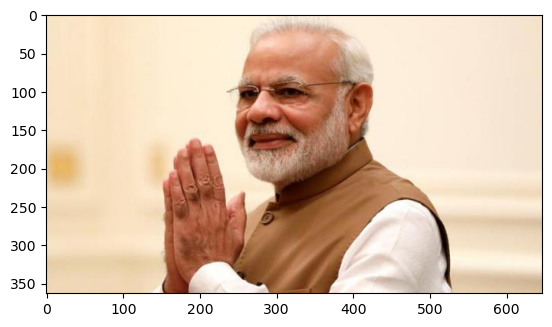

In [4]:
plt.imshow(img)

In [5]:
i1= cv2.imread(r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Modi.jpeg')
i1

array([[[198, 230, 249],
        [198, 230, 249],
        [198, 230, 249],
        ...,
        [202, 226, 244],
        [202, 226, 244],
        [202, 226, 244]],

       [[198, 230, 249],
        [198, 230, 249],
        [198, 230, 249],
        ...,
        [202, 226, 244],
        [202, 226, 244],
        [202, 226, 244]],

       [[198, 230, 249],
        [198, 230, 249],
        [197, 229, 248],
        ...,
        [202, 226, 244],
        [202, 226, 244],
        [202, 226, 244]],

       ...,

       [[184, 215, 240],
        [184, 215, 240],
        [184, 215, 240],
        ...,
        [162, 193, 218],
        [161, 192, 217],
        [161, 192, 217]],

       [[184, 215, 240],
        [184, 215, 240],
        [184, 215, 240],
        ...,
        [162, 193, 218],
        [161, 192, 217],
        [161, 192, 217]],

       [[184, 215, 240],
        [184, 215, 240],
        [184, 215, 240],
        ...,
        [163, 193, 218],
        [162, 192, 217],
        [162, 192, 217]]

In [6]:
i1.shape  

(363, 647, 3)

In [7]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset=train.flow_from_directory(r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Training',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Validation',
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

Found 164 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [9]:
 train_dataset.class_indices

{'Happy': 0, 'Not Happy': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

C:\Users\umari\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    17,334,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,358,881 (66.22 MB)

 Trainable params: 17,358,881 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import tensorflow as tf


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset) 

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - accuracy: 0.5556 - loss: 9.8985 - val_accuracy: 0.1111 - val_loss: 8.9790
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step - accuracy: 0.5556 - loss: 2.8379 - val_accuracy: 0.8889 - val_loss: 0.5948
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - accuracy: 0.3333 - loss: 1.2054 - val_accuracy: 0.2222 - val_loss: 0.7110
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.5556 - loss: 0.6465 - val_accuracy: 0.8889 - val_loss: 0.4949
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.6667 - loss: 0.5719 - val_accuracy: 0.8889 - val_loss: 0.5762
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.8889 - loss: 0.3135 - val_accuracy: 0.8889 - val_loss: 0.4150
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step - accuracy: 0.5556 - loss: 1.7820 - val_accuracy: 0.8889 - val_loss: 0.6514
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.6667 - loss: 0.6205 - val_accuracy: 0.7778 - val_loss:

In [15]:
history.history??

Object `history.history` not found.


Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.5732 - loss: 0.7331 - val_accuracy: 0.7778 - val_loss: 0.6916
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.7012 - loss: 0.6724 - val_accuracy: 0.8889 - val_loss: 0.3508
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.7256 - loss: 0.5874 - val_accuracy: 0.8889 - val_loss: 0.4619
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.8171 - loss: 0.4441 - val_accuracy: 0.8889 - val_loss: 0.4983
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 221ms/step - accuracy: 0.8293 - loss: 0.3541 - val_accuracy: 0.7778 - val_loss: 0.6607


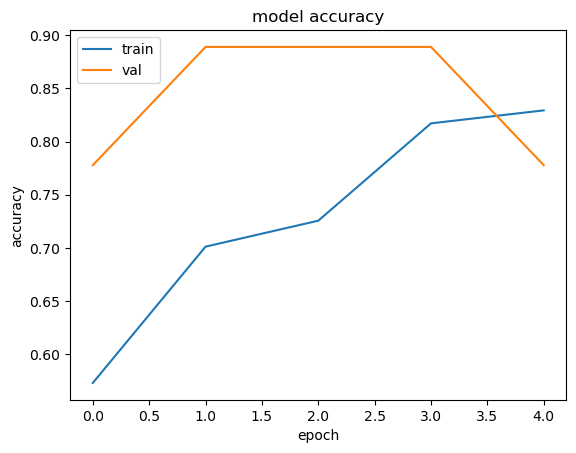

In [16]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
history=model_fit=model.fit(train_dataset,epochs=5,validation_data=validation_dataset) 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

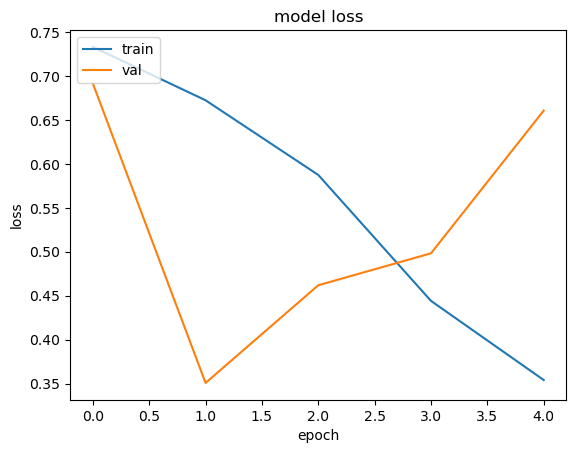

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()